Päiväkohtaiset todetut korona-tartunnat ja koronaan kuolleet vaihtelevat paljon päivästä toiseen. Paremman kuvan korona-tilanteen kehittymisestä saa esimerkiksi 7 päivän liukuvista keskiarvoista.

Seuraavassa esimerkki muutamien maiden osalta. Kopioimalla koodin itsellesi ja ajamalla koodit saat tuoreimman  tilanteen.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Grafiikan tyyliasetus
plt.style.use('ggplot')

# Näitä käyttäen saan kaavioiden vaaka-akselille siististi päivämääriä viikon välein
from matplotlib.ticker import MultipleLocator
from matplotlib.dates import DateFormatter
myLoc = MultipleLocator(7)
myFmt = DateFormatter('%d.%m')

# Ajantasaisen datan nouto
df = pd.read_excel('https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx')

# Päivämäärät indeksiin
df.index = pd.to_datetime(df['dateRep'])
df = df.drop('dateRep', axis=1).sort_index()
df

,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
dateRep,,,,,,,,,,
2019-12-31,31,12,2019,0,0,Russia,RU,RUS,144478050.0,Europe
2019-12-31,31,12,2019,0,0,Nigeria,NG,NGA,195874740.0,Africa
2019-12-31,31,12,2019,0,0,Dominican_Republic,DO,DOM,10627165.0,America
2019-12-31,31,12,2019,0,0,Sri_Lanka,LK,LKA,21670000.0,Asia
2019-12-31,31,12,2019,0,0,United_Kingdom,UK,GBR,66488991.0,Europe
...,...,...,...,...,...,...,...,...,...,...
2020-04-25,25,4,2020,22,0,Rwanda,RW,RWA,12301939.0,Africa
2020-04-25,25,4,2020,27,5,Greece,EL,GRC,10727668.0,Europe
2020-04-25,25,4,2020,0,0,Saint_Lucia,LC,LCA,181889.0,America


In [2]:
def liukuva7(maa):
    df_maa = df[df['countriesAndTerritories'] == maa][['cases', 'deaths']]
    fig, ax1 = plt.subplots(figsize = (14, 6))
    ax1.set_ylabel('cases 7 päivän liukuva ka', color='C0', fontsize=14)
    ax1.plot(df_maa['cases'].rolling(7).mean(), color='C0')
    ax2 = ax1.twinx()
    ax2.set_ylabel('deaths 7 päivän liukuva ka', color='C1', fontsize=14)
    ax2.plot(df_maa['deaths'].rolling(7).mean(), color='C1')
    ax1.xaxis.set_major_locator(myLoc)
    ax1.xaxis.set_major_formatter(myFmt)
    ax1.set_title(maa)

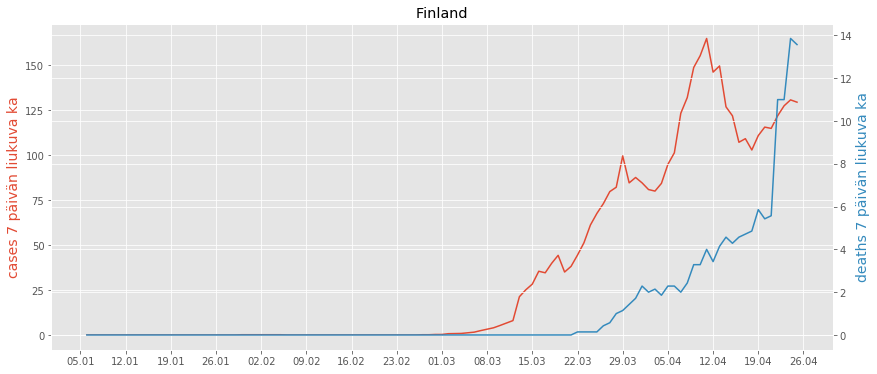

In [3]:
liukuva7('Finland')

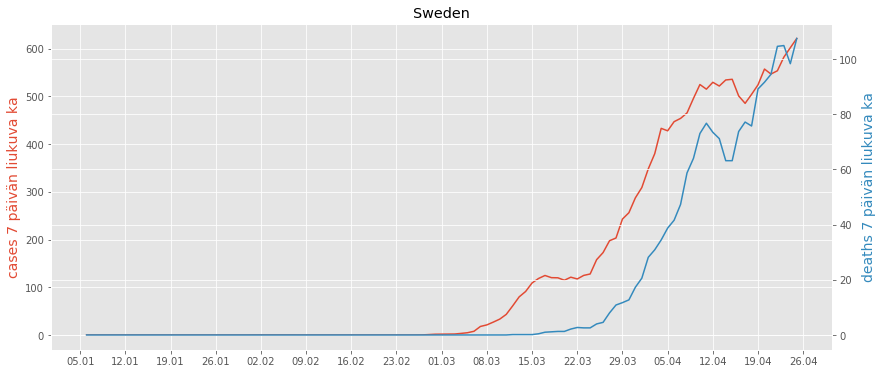

In [4]:
liukuva7('Sweden')

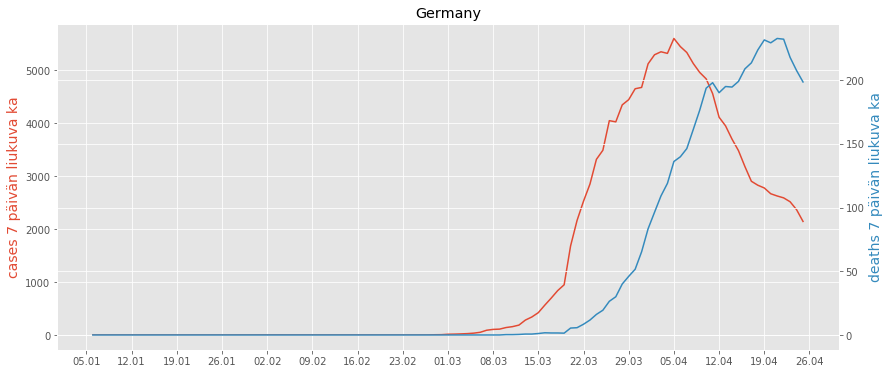

In [5]:
liukuva7('Germany')

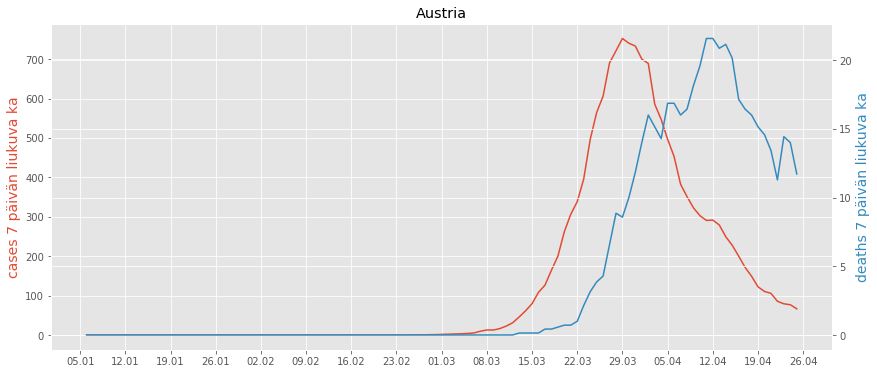

In [6]:
liukuva7('Austria')

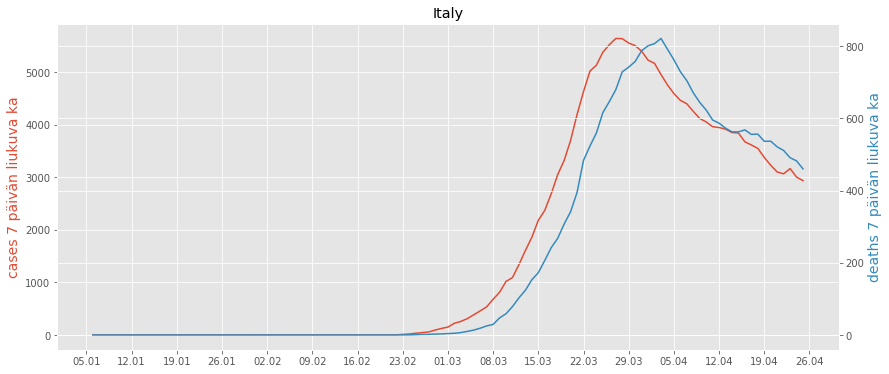

In [7]:
liukuva7('Italy')

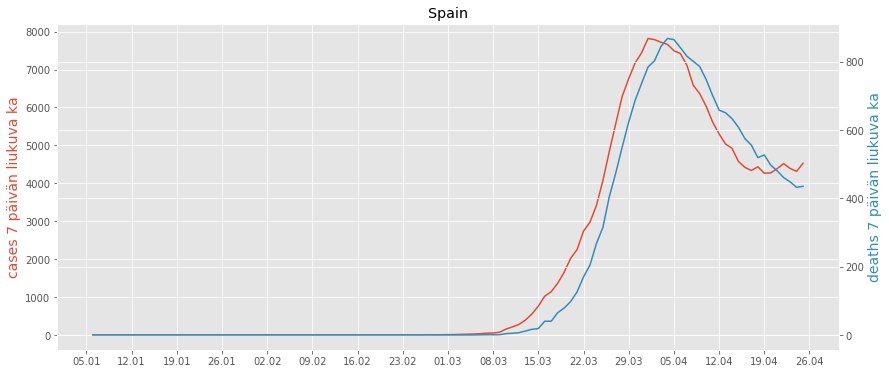

In [8]:
liukuva7('Spain')

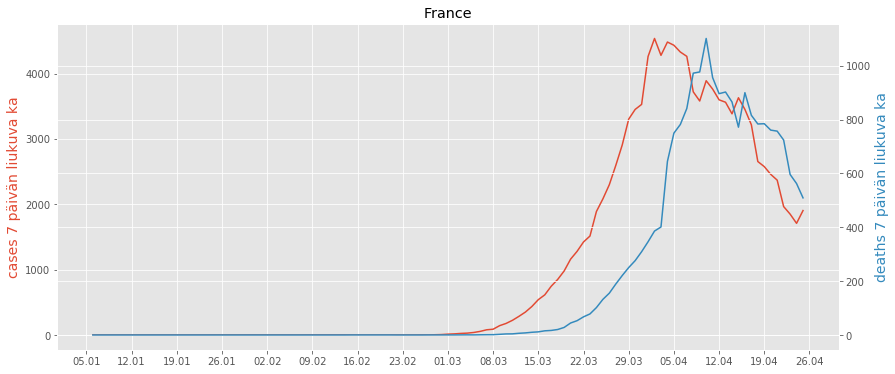

In [9]:
liukuva7('France')

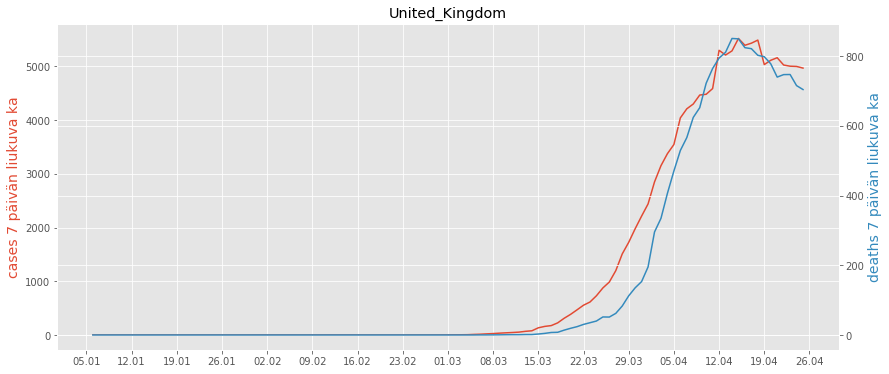

In [10]:
liukuva7('United_Kingdom')

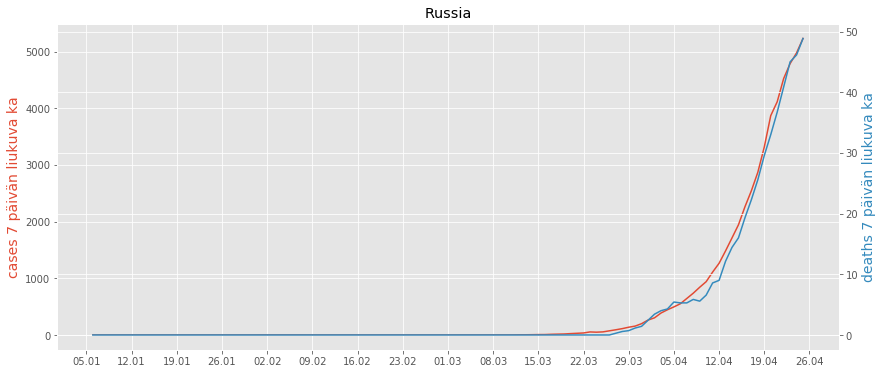

In [11]:
liukuva7('Russia')

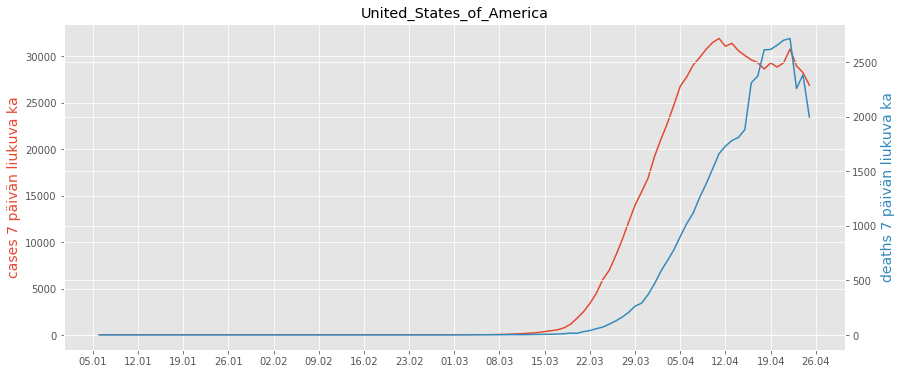

In [12]:
liukuva7('United_States_of_America')

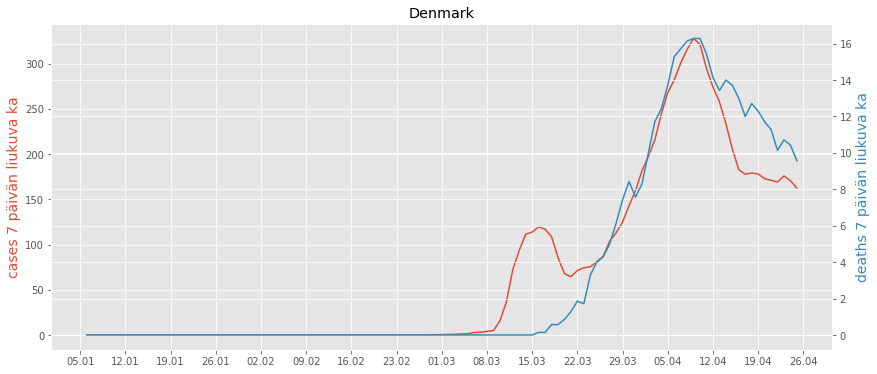

In [13]:
liukuva7('Denmark')

In [14]:
# Jos haluat katsoa jonkun muun maan tietoja, niin katso oikea kirjoitusasu:
np.sort(pd.unique(df['countriesAndTerritories']))

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua_and_Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia_and_Herzegovina',
       'Botswana', 'Brazil', 'British_Virgin_Islands',
       'Brunei_Darussalam', 'Bulgaria', 'Burkina_Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape_Verde',
       'Cases_on_an_international_conveyance_Japan', 'Cayman_Islands',
       'Central_African_Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo', 'Costa_Rica', 'Cote_dIvoire', 'Croatia', 'Cuba',
       'CuraÃ§ao', 'Cyprus', 'Czechia',
       'Democratic_Republic_of_the_Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican_Republic', 'Ecuador', 'Egypt',
       'El_Salvador', 'Equatorial_Guinea', 'Eritrea', 'Es